In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import general_functions

## Two companies $\alpha$

In [5]:
def sim_alpha(steps: int, alpha: float, show_output, p_limit=False) -> tuple:
    """Two company transactions. Company 0 starts as buyer.

    Args:
        steps (int): System iterations
        alpha (float): Money to production efficiency parameter

    Returns:
        tuple: history of p and m values for both companies
    """
    # Initial m and p values and history arrays
    p = np.empty((2, steps))
    m = np.empty_like(p)
    p[:, 0] = [1, 1]
    m[:, 0] = [1, 1]
    
    buyer_idx = 0
    seller_idx = 1

    company_names = ["A", "B"]
    if show_output:
        print(f"alpha = {alpha}")
        print("\t    A \t           B")
        print("Buyer\t  p   m \t p   m \t Sum all")
        print(f"  \t {p[0, 0]} {m[0, 0]}\t{p[1, 0]} {m[1, 0]}\t   {p[:, 0].sum() + m[:, 0].sum()}\n")
    

    for i in range(1, steps):
        # Buyer gives money to seller, in turn increasing the buyer's production
        # Find money transfered
        if p_limit:
            delta_m = np.min((m[buyer_idx, i-1], p[seller_idx, i-1]))
        else:
            delta_m = m[buyer_idx, i-1]
        # Update values
        m[buyer_idx, i] = m[buyer_idx, i-1] - delta_m
        m[seller_idx, i] = m[seller_idx, i-1] + delta_m
        p[buyer_idx, i] = p[buyer_idx, i-1] + alpha * delta_m
        
        # Also record the unchanged value
        p[seller_idx, i] = p[seller_idx, i-1]
        
        # Print 
        sum_all = p[:, i].sum() + m[:, i].sum()
        if show_output: print(f"  {company_names[buyer_idx]}\t {p[0, i]} {m[0, i]}\t{p[1, i]} {m[1, i]}\t   {sum_all}\n")
        
        # Swap buyer and seller idx
        temp_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = temp_buyer
    
    return p, m


def sim_alpha_delta(steps, alpha, delta, show_output, p_limit=False):
    """Two company transactions with alpha and delta. Company 0 starts as buyer.

    Args:
        steps (int): System iterations
        alpha (float): Money to production efficiency parameter
        delta (float): Production seller uses in 

    Returns:
        tuple: history of p and m values for both companies
    """
    # Initial m and p values and history arrays
    p = np.empty((2, steps))
    m = np.empty_like(p)
    p[:, 0] = [1, 1]
    m[:, 0] = [1, 1]
    
    buyer_idx = 0
    seller_idx = 1

    company_names = ["A", "B"]

    if show_output:
        print(f"alpha = {alpha} delta={delta}")
        print("\t    A \t           B")
        print("Buyer\t  p   m \t p   m \t Sum all")
        print(f"  \t {p[0, 0]} {m[0, 0]}\t{p[1, 0]} {m[1, 0]}\t   {p[:, 0].sum() + m[:, 0].sum()}\n")
    

    for i in range(1, steps):
        # Buyer gives money to seller, in turn increasing the buyer's production
        # Find money transfered
        if p_limit:
            delta_m = np.min((m[buyer_idx, i-1], p[seller_idx, i-1]))
        else:
            delta_m = m[buyer_idx, i-1]
        # Update values
        m[buyer_idx, i] = m[buyer_idx, i-1] - delta_m
        m[seller_idx, i] = m[seller_idx, i-1] + delta_m
        p[buyer_idx, i] = p[buyer_idx, i-1] + alpha * delta_m
        p[seller_idx, i] = p[seller_idx, i-1] - delta * delta_m
        
        # Print 
        if show_output:
            sum_all = p[:, i].sum() + m[:, i].sum()
            print(f"  {company_names[buyer_idx]}\t {p[0, i]} {m[0, i]}\t{p[1, i]} {m[1, i]}\t   {sum_all}\n")
        
        # Swap buyer and seller idx
        temp_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = temp_buyer
    return p, m


def sim_debt_three_company(steps, alpha, r, show_output, p_limit=False):
    """Three company transactions. Company 0 starts as buyer.

    Args:
        steps (int): System iterations
        alpha (float): Money to production efficiency parameter

    Returns:
        tuple: history of p and m values for both companies
    """
    # Initial m and p values and history arrays
    p = np.empty((3, steps))
    m = np.empty_like(p)
    other_own_you = np.empty_like(p)
    you_own_other = np.empty_like(p)
    p[:, 0] = 1
    m[:, 0] = 1
    other_own_you[:, 0] = 0  # What others own you in debt. Gains money from this.
    you_own_other[:, 0] = 0  # What you own others. Lose money to this
    
    buyer_seller_lender_idx = np.array([0, 1, 2])

    company_names = ["A", "B", "C"]
    if show_output:
        print(f"alpha = {alpha}")
        print("\t          A \t                B \t              C")
        print("Buyer\t p    m   d-   d+ \t p    m   d-   d+ \t p    m   d-   d+ \t    p+m")
        
        s = (f"\t{p[0, 0]:.1f}  {m[0, 0]:.1f}  {you_own_other[0, 0]:.1f}  {other_own_you[0, 0]:.1f}\t"
        f"{p[1, 0]:.1f}  {m[1, 0]:.1f}  {you_own_other[1, 0]:.1f}  {other_own_you[1, 0]:.1f}\t"
        f"{p[2, 0]:.1f}  {m[2, 0]:.1f}  {you_own_other[2, 0]:.1f}  {other_own_you[2, 0]:.1f}\t"
        f"{p[:, 0].sum() + m[:, 0].sum()}")
        print(s)

    for i in range(1, steps):        
        # Buyer gives money to seller, in turn increasing the buyer's production. 
        # If the buyer's money is less than the seller's production, take loan from third party.
        
        # Determine roles
        buyer_idx = buyer_seller_lender_idx[0]
        seller_idx = buyer_seller_lender_idx[1]
        lender_idx = buyer_seller_lender_idx[2]
        
        # Buyer takes debt from lender if has less money than seller's production.
        if p[seller_idx, i-1] > m[buyer_idx, i-1]:
            # Debt amount to match m = p
            delta_d = np.min((p[seller_idx, i-1] - m[buyer_idx, i-1], m[lender_idx, i-1]))  # Lender cannot go negative
            # Update buyer and lender values
            m[buyer_idx, i-1] += delta_d
            m[lender_idx, i-1] -= delta_d
            you_own_other[buyer_idx, i-1] += delta_d
            other_own_you[lender_idx, i-1] += delta_d
        
        # Money transfered
        if p_limit:
            delta_m = np.min((m[buyer_idx, i-1], p[seller_idx, i-1]))
        else:
            delta_m = m[buyer_idx, i-1]
            
        # Update values
        # From transcation
        m[buyer_idx, i] = m[buyer_idx, i-1] - delta_m
        m[seller_idx, i] = m[seller_idx, i-1] + delta_m
        p[buyer_idx, i] = p[buyer_idx, i-1] + alpha * delta_m

        # Also record the unchanged value
        p[seller_idx, i] = p[seller_idx, i-1] * 1
        p[lender_idx, i] = p[lender_idx, i-1] * 1
        m[lender_idx, i] = m[lender_idx, i-1] * 1
        other_own_you[:, i] = other_own_you[:, i-1] * 1
        you_own_other[:, i] = you_own_other[:, i-1] * 1
        
        # Pay interest rates once every company has sold once. 
        if i % 3 == 0:
            m[:, i] = m[:, i] + r * (other_own_you[:, i] - you_own_other[:, i])
        
        # Print 
        sum_all = p[:, i].sum() + m[:, i].sum()
        if show_output: 
            s = (f"{company_names[buyer_idx]}\t"
                 f"{p[0, i]:.1f}  {m[0, i]:.1f}  {you_own_other[0, i]:.1f}  {other_own_you[0, i]:.1f}\t"
                 f"{p[1, i]:.1f}  {m[1, i]:.1f}  {you_own_other[1, i]:.1f}  {other_own_you[1, i]:.1f}\t"
                 f"{p[2, i]:.1f}  {m[2, i]:.1f}  {you_own_other[2, i]:.1f}  {other_own_you[2, i]:.1f}\t"
                 f"{sum_all:.1f}")
                
            print(s)    
        
        # Shift buyer/seller/lender roles
        buyer_seller_lender_idx = np.roll(buyer_seller_lender_idx, shift=-1)

    return p, m, other_own_you, you_own_other


def sim_debt_reservoir(steps, alpha, r, show_output, p_limit=False):
    """Two company transactions. Company 0 starts as buyer. Debt is made from reservoir.

    Args:
        steps (int): System iterations
        alpha (float): Money to production efficiency parameter

    Returns:
        tuple: history of p and m values for both companies
    """
    # Initial m and p values and history arrays
    p = np.empty((2, steps))
    m = np.empty_like(p)
    d = np.empty_like(p)
    p[:, 0] = 1
    m[:, 0] = 1
    d[:, 0] = 0
    
    buyer_idx = 0
    seller_idx = 1

    company_names = ["A", "B"]
    if show_output:    
        print(f"alpha = {alpha}")
        print("\t          A \t   B\t        p + m")
        print("Buyer\t p    m   d-  \t p    m   d-")
        
        s = (f"\t{p[0, 0]:.1f}  {m[0, 0]:.1f}  {d[0, 0]:.1f}\t"
        f"{p[1, 0]:.1f}  {m[1, 0]:.1f}  {d[1, 0]:.1f} \t"
        f"{p[:, 0].sum() + m[:, 0].sum()}")
        print(s)

    for i in range(1, steps):
        if p[seller_idx, i-1] > m[buyer_idx, i-1]:
            # Debt amount to match m = p
            delta_d = p[seller_idx, i-1] - m[buyer_idx, i-1]
            # Update money and debt values
            m[buyer_idx, i-1] += delta_d
            d[buyer_idx, i-1] += delta_d
        
        # Buyer gives money to seller, in turn increasing the buyer's production
        # Find money transfered
        if p_limit:
            delta_m = np.min((m[buyer_idx, i-1], p[seller_idx, i-1]))
        else:
            delta_m = np.min(m[buyer_idx, i-1])
        
        # Update values
        m[buyer_idx, i] = m[buyer_idx, i-1] - delta_m
        m[seller_idx, i] = m[seller_idx, i-1] + delta_m
        p[buyer_idx, i] = p[buyer_idx, i-1] + alpha * delta_m
            
        # Also record the unchanged value
        p[seller_idx, i] = p[seller_idx, i-1]
        d[seller_idx, i] = d[seller_idx, i-1]
        d[buyer_idx, i] = d[buyer_idx, i-1]
    
        # Pay debt
        if i % 2 == 0:
            m[:, i] -= r * d[:, i]

        # Print 
        if show_output: 
            s = (f"{company_names[buyer_idx]}\t"
                 f"{p[0, i]:.1f}  {m[0, i]:.1f}  {d[0, i]:.1f}\t"
                f"{p[1, i]:.1f}  {m[1, i]:.1f}  {d[1, i]:.1f} \t"
                f"{p[:, i].sum() + m[:, i].sum()}")
            print(s)
            
        # Swap buyer and seller idx
        temp_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = temp_buyer
    
    return p, m, d


def sim_debt_bank(steps, alpha, r, show_output, p_limit=False):
    # Options:
        # Bank has no production. 
        # Bank gets money proportional to its money reflecting investments
        # Bank gets money from interest rates.
    """Two company transactions. Company 0 starts as buyer. Debt is taken from a bank agent.

    Args:
        steps (int): System iterations
        alpha (float): Money to production efficiency parameter

    Returns:
        tuple: history of p and m values for both companies
    """
    # Initial m and p values and history arrays
    p = np.empty((2, steps))
    m = np.empty((3, steps))
    d = np.empty_like(p)
    p[:, 0] = 1
    m[:, 0] = 1
    d[:, 0] = 0
    
    buyer_idx = 0
    seller_idx = 1
    bank_idx = 2

    company_names = ["A", "B"]
    if show_output:    
        print(f"alpha = {alpha}")
        print("\t          A \t   B\t        p + m")
        print("Buyer\t p    m   d-  \t p    m   d-")
        
        s = (f"\t{p[0, 0]:.1f}  {m[0, 0]:.1f}  {d[0, 0]:.1f}\t"
        f"{p[1, 0]:.1f}  {m[1, 0]:.1f}  {d[1, 0]:.1f} \t"
        f"{p[:, 0].sum() + m[:, 0].sum()}")
        print(s)

    for i in range(1, steps):
        if p[seller_idx, i-1] > m[buyer_idx, i-1]:
            # Debt amount to match m = p
            delta_d = p[seller_idx, i-1] - m[buyer_idx, i-1]
            # Update money and debt values
            m[buyer_idx, i-1] += delta_d
            d[buyer_idx, i-1] += delta_d
            m[bank_idx, i-1] -= delta_d
        
        # Buyer gives money to seller, in turn increasing the buyer's production
        # Find money transfered
        if p_limit:
            delta_m = np.min((m[buyer_idx, i-1], p[seller_idx, i-1]))
        else:
            delta_m = np.min(m[buyer_idx, i-1])
        
        # Update values
        m[buyer_idx, i] = m[buyer_idx, i-1] - delta_m
        m[seller_idx, i] = m[seller_idx, i-1] + delta_m
        p[buyer_idx, i] = p[buyer_idx, i-1] + alpha * delta_m
            
        # Also record the unchanged value
        p[seller_idx, i] = p[seller_idx, i-1]
        d[seller_idx, i] = d[seller_idx, i-1]
        d[buyer_idx, i] = d[buyer_idx, i-1]
        m[bank_idx, i] = m[bank_idx, i-1]
    
        # Debt payments
        if i % 2 == 0:
            m[:2, i] -= r * d[:, i]
            m[bank_idx, i] += r * d[:, i].sum()

        # Print 
        if show_output: 
            s = (f"{company_names[buyer_idx]}\t"
                 f"{p[0, i]:.1f}  {m[0, i]:.1f}  {d[0, i]:.1f}\t"
                f"{p[1, i]:.1f}  {m[1, i]:.1f}  {d[1, i]:.1f} \t"
                f"{p[:, i].sum() + m[:, i].sum()}")
            print(s)
            
        # Swap buyer and seller idx
        dummy_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = dummy_buyer
    
    return p, m, d

In [6]:
def linear(x, a, b):
    return a * x + b


def exponential(x, a):
    return np.exp(a*x)


def plot_alpha(steps, alpha, show_output=False, p_limit=False):
    p, m = sim_alpha(steps, alpha, show_output, p_limit)
    p_a = p[0, :]
    p_b = p[1, :]
    m_a = m[0, :]
    m_b = m[1, :]
    steps = np.arange(len(p_a))
    alpha_line = linear(steps, a=alpha, b=p_a[0])
    
    fig, (ax, ax1) = plt.subplots(nrows=2)
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    ax.plot(steps, alpha_line, ls="dashed", color="black")
    ax1.plot(steps, m_a, color="rebeccapurple")
    ax1.plot(steps, m_b, color="firebrick")
    
    ax.set(ylabel="$ Amount", title=f"Production capacity $p$")
    ax1.set(xlabel="Steps", ylabel="$ Amount")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),
                        Line2D([], [], color="black", label=fr"$y=\alpha x + p_0$"),]
    ax.legend(handles=legend_elements, ncols=3, bbox_to_anchor=(0.05, 0.75), loc="lower left")
    fig.suptitle(t=fr"$\alpha = {alpha}$")
    plt.show()


def plot_alpha_delta(steps, alpha, delta, show_output=False, p_limit=False):
    p, m = sim_alpha_delta(steps, alpha, delta, show_output, p_limit)
    p_a = p[0, :]
    p_b = p[1, :]
    m_a = m[0, :]
    m_b = m[1, :]
    steps = np.arange(len(p_a))
    alpha_line = linear(steps, a=alpha-delta, b=p_a[0])
    
    fig, (ax, ax1) = plt.subplots(nrows=2)
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    ax.plot(steps, alpha_line, ls="dashed", color="black")
    ax1.plot(steps, m_a, color="rebeccapurple")
    ax1.plot(steps, m_b, color="firebrick")
    
    ax.set(ylabel="$ Amount", title=r"Production capacity $p$")
    ax1.set(xlabel="Steps", ylabel="$ Amount", title=r"Money $m$")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),
                        Line2D([], [], color="black", label=fr"$y=(\alpha - \delta) x + p_0$"),]
    ax.legend(handles=legend_elements, ncols=3, bbox_to_anchor=(0.05, 0.75), loc="lower left")
    fig.suptitle(t=fr"$\alpha = {alpha} \delta={delta}$")
    plt.show()


def plot_compare_alpha_delta(steps, alpha, delta):
    # Get and extract data
    p_A, m_A = sim_alpha(steps, alpha)
    p_AD, m_AD = sim_alpha_delta(steps, alpha, delta)
    
    p_A1 = p_A[0, :]
    m_A1 = m_A[0, :]
    p_AD1 = p_AD[0, :]
    m_AD1 = m_AD[0, :]
    
    steps = np.arange(len(p_A1))
    alpha_line = linear(steps, a=alpha-delta, b=p_A1[0])
    
    fig, (ax, ax1) = plt.subplots(nrows=2)
    ax.plot(steps, p_A1, color="rebeccapurple")
    ax.plot(steps, p_AD1, color="firebrick")
    ax.plot(steps, alpha_line, ls="dashed", color="black")
    ax1.plot(steps, m_A1, color="rebeccapurple")
    ax1.plot(steps, m_AD1, color="firebrick")
    
    ax.set(ylabel="$ Amount", title=fr"$\alpha = {alpha}$")
    ax1.set(xlabel="Steps", ylabel="$ Amount")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="$\alpha$"),
                        Line2D([], [], color="firebrick", label="$\alpha-\delta$"),
                        Line2D([], [], color="black", label=fr"$y=(\alpha - \delta) x + p_0$"),]
    ax.legend(handles=legend_elements, ncols=3, bbox_to_anchor=(0.05, 0.75), loc="lower left")
    plt.show()
    
    
def plot_debt_three_company(steps, alpha, r, p_limit):
    # Get and extract data
    p, m, other_own_you, you_own_other  = sim_debt_three_company(steps, alpha, r, p_limit=p_limit, show_output=False)
    
    p_a = p[0, :]
    p_b = p[1, :]
    p_c = p[2, :]
    m_a = m[0, :]
    m_b = m[1, :]
    m_c = m[2, :]
    dplus_a = other_own_you[0, :]
    dplus_b = other_own_you[1, :]
    dplus_c = other_own_you[2, :]
    dneg_a = you_own_other[0, :]
    dneg_b = you_own_other[1, :]
    dneg_c = you_own_other[2, :]
    
    steps = np.arange(len(p_a))
    alpha_line = linear(steps, a=alpha, b=p[0])
    
    fig, ax = plt.subplots(nrows=2, ncols=2)
    ax0 = ax[0, 0]
    ax1 = ax[0, 1]
    ax2 = ax[1, 0]
    ax3 = ax[1, 1]
    
    # Production
    ax0.plot(steps, p_a)
    ax0.plot(steps, p_b)
    ax0.plot(steps, p_c)
    # ax0.set(yscale="log")
    
    # Positive debt
    ax1.plot(steps, dplus_a)
    ax1.plot(steps, dplus_b)
    ax1.plot(steps, dplus_c)

    # Money
    ax2.plot(steps, m_a)
    ax2.plot(steps, m_b)
    ax2.plot(steps, m_c)
    ax2.plot(steps, m.sum(axis=0), ls="dashed", c="orange")

    # Negative debt
    ax3.plot(steps, dneg_a)
    ax3.plot(steps, dneg_b)
    ax3.plot(steps, dneg_c)
    
    # Axis setup
    ax0.set(title=r"Production $p$", ylabel="$ Amount")
    ax1.set(title=r"Other own you $d_+$")
    ax2.set(title=r"Money $m$", xlabel="Steps", ylabel="$ Amount")
    ax3.set(title=r"You own other $d_-$", xlabel="Steps")
    
    ax0.grid()
    ax1.grid()
    ax2.grid()
    ax3.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),
                        Line2D([], [], color="black", label=fr"C"),]
    fig.legend(handles=legend_elements, ncols=3, bbox_to_anchor=(0.5, 0.45), loc="lower center")
    fig.suptitle(fr"Debt to company. $\alpha = {alpha}, r = {r}$")
    plt.show()
    
    
def plot_debt_reservoir(steps, alpha, r, p_limit=False):
    p, m, d = sim_debt_reservoir(steps, alpha, r, show_output=False, p_limit=p_limit)
    p_a = p[0, :]
    p_b = p[1, :]
    m_a = m[0, :]
    m_b = m[1, :]
    d_a = d[0, :]
    d_b = d[1, :]
    
    steps = np.arange(len(p_a))
    # alpha_line = exponential(steps, a=alpha-r, b=p_a[0])
    
    fig, (ax, ax1, ax2) = plt.subplots(nrows=3)
    # Production
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    # ax.plot(steps, alpha_line, ls="dashed", color="black")
    
    # Money
    ax1.plot(steps, m_a, color="rebeccapurple")
    ax1.plot(steps, m_b, color="firebrick")
    ax1.plot(steps, m_a+m_b, ls="dashed", c="orange")
    
    # Debt
    ax2.plot(steps, d_a, color="rebeccapurple")
    ax2.plot(steps, d_b, color="firebrick")
    
    # Axis setup
    ax.set(ylabel="$ Amount", title=r"Production capacity $p$", yscale="log")
    ax1.set(ylabel="$ Amount", title=r"Money $m$")
    ax2.set(xlabel="Steps", ylabel="$ Amount", title=r"Debt $d$")
    
    ax.grid()
    ax1.grid()
    ax2.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),]
                        # Line2D([], [], color="black", label=fr"$y=p_0 \exp(\alpha x)$"),]
    ax.legend(handles=legend_elements, ncols=3, bbox_to_anchor=(0.05, 0.75), loc="lower left")
    fig.suptitle(t=fr"Debt reservoir. $\alpha = {alpha}, r = {r}$")
    plt.show()
    

def plot_debt_bank(steps, alpha, r, p_limit=False):
    p, m, d = sim_debt_bank(steps, alpha, r, show_output=False, p_limit=p_limit)
    p_a = p[0, :]
    p_b = p[1, :]
    m_a = m[0, :]
    m_b = m[1, :]
    m_c = m[2, :]
    d_a = d[0, :]
    d_b = d[1, :]
    
    steps = np.arange(len(p_a))
    # alpha_line = exponential(steps, a=alpha-r, b=p_a[0])
    
    fig, (ax, ax1, ax2) = plt.subplots(nrows=3)
    # Production
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    # ax.plot(steps, alpha_line, ls="dashed", color="black")
    
    # Money
    ax1.plot(steps, m_a, color="rebeccapurple")
    ax1.plot(steps, m_b, color="firebrick")
    ax1.plot(steps, m_c + r*(d_a+d_b), color="orange")
    # ax1.plot(steps, m_a+m_b, ls="dashed", c="orange")
    
    # Debt
    ax2.plot(steps, d_a, color="rebeccapurple")
    ax2.plot(steps, d_b, color="firebrick")
    
    # Axis setup
    ax.set(ylabel="Log $ Amount", title=r"Production capacity $p$", yscale="log")
    ax1.set(ylabel="$ Amount", title=r"Money $m$")
    ax2.set(xlabel="Steps", ylabel="Log $ Amount", title=r"Debt $d$", yscale="log")
    
    ax.grid()
    ax1.grid()
    ax2.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="Comp. A"),
                        Line2D([], [], color="firebrick", label="Comp. B"),
                        Line2D([], [], color="orange", label="Bank"),]
                        # Line2D([], [], color="black", label=fr"$y=p_0 \exp(\alpha x)$"),]
    ax.legend(handles=legend_elements, ncols=3, bbox_to_anchor=(0.05, 0.75), loc="lower left")
    fig.suptitle(t=fr"Debt from bank. $\alpha = {alpha}, r = {r}$")
    plt.show()

In [7]:
print("\t--alpha--")
sim_alpha(steps=5, alpha=0.5, show_output=True);
print("\t--alpha - delta --")
sim_alpha_delta(steps=5, alpha=1, delta=0.5, show_output=True);

	--alpha--
alpha = 0.5
	    A 	           B
Buyer	  p   m 	 p   m 	 Sum all
  	 1.0 1.0	1.0 1.0	   4.0

  A	 1.5 0.0	1.0 2.0	   4.5

  B	 1.5 2.0	2.0 0.0	   5.5

  A	 2.5 0.0	2.0 2.0	   6.5

  B	 2.5 2.0	3.0 0.0	   7.5

	--alpha - delta --
alpha = 1 delta=0.5
	    A 	           B
Buyer	  p   m 	 p   m 	 Sum all
  	 1.0 1.0	1.0 1.0	   4.0

  A	 2.0 0.0	0.5 2.0	   4.5

  B	 1.0 2.0	2.5 0.0	   5.5

  A	 3.0 0.0	1.5 2.0	   6.5

  B	 2.0 2.0	3.5 0.0	   7.5



In [8]:
print("\t--Three company debt--")
sim_debt_three_company(steps=16, alpha=1, r=0.5, show_output=True, p_limit=False);

	--Three company debt--
alpha = 1
	          A 	                B 	              C
Buyer	 p    m   d-   d+ 	 p    m   d-   d+ 	 p    m   d-   d+ 	    p+m
	1.0  1.0  0.0  0.0	1.0  1.0  0.0  0.0	1.0  1.0  0.0  0.0	6.0
A	2.0  0.0  0.0  0.0	1.0  2.0  0.0  0.0	1.0  1.0  0.0  0.0	7.0
B	2.0  0.0  0.0  0.0	3.0  0.0  0.0  0.0	1.0  3.0  0.0  0.0	9.0
C	2.0  3.0  0.0  0.0	3.0  0.0  0.0  0.0	4.0  0.0  0.0  0.0	12.0
A	5.0  0.0  0.0  0.0	3.0  3.0  0.0  0.0	4.0  0.0  0.0  0.0	15.0
B	5.0  0.0  0.0  0.0	6.0  0.0  0.0  0.0	4.0  3.0  0.0  0.0	18.0
C	5.0  3.0  0.0  0.0	6.0  0.0  0.0  0.0	7.0  0.0  0.0  0.0	21.0
A	8.0  0.0  0.0  0.0	6.0  3.0  0.0  0.0	7.0  0.0  0.0  0.0	24.0
B	8.0  0.0  0.0  0.0	9.0  0.0  0.0  0.0	7.0  3.0  0.0  0.0	27.0
C	8.0  3.0  0.0  0.0	9.0  0.0  0.0  0.0	10.0  0.0  0.0  0.0	30.0
A	11.0  0.0  0.0  0.0	9.0  3.0  0.0  0.0	10.0  0.0  0.0  0.0	33.0
B	11.0  0.0  0.0  0.0	12.0  0.0  0.0  0.0	10.0  3.0  0.0  0.0	36.0
C	11.0  3.0  0.0  0.0	12.0  0.0  0.0  0.0	13.0  0.0  0.0  0.0	39.0
A	14.0  0

In [9]:
print("\t-- Debt reservoir --")
sim_debt_reservoir(steps=10, alpha=1, r=0.5, show_output=True, p_limit=False);

	-- Debt reservoir --
alpha = 1
	          A 	   B	        p + m
Buyer	 p    m   d-  	 p    m   d-
	1.0  1.0  0.0	1.0  1.0  0.0 	4.0
A	2.0  0.0  0.0	1.0  2.0  0.0 	5.0
B	2.0  2.0  0.0	3.0  0.0  0.0 	7.0
A	5.0  0.0  1.0	3.0  3.0  0.0 	11.0
B	5.0  4.5  1.0	8.0  -1.0  2.0 	16.5
A	13.0  0.0  4.5	8.0  7.0  2.0 	28.0
B	13.0  10.8  4.5	21.0  -4.0  8.0 	40.75
A	34.0  0.0  14.8	21.0  17.0  8.0 	72.0
B	34.0  26.6  14.8	55.0  -12.5  25.0 	103.125
A	89.0  0.0  43.1	55.0  42.5  25.0 	186.5


Check alpha-delta stochastic for 3 firmaer

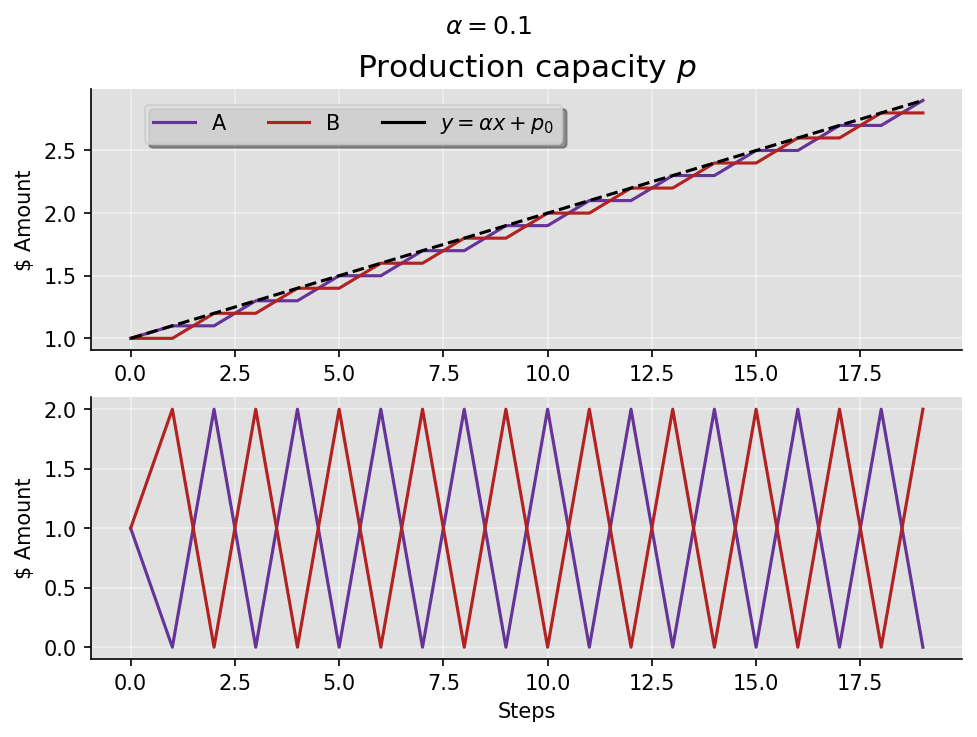

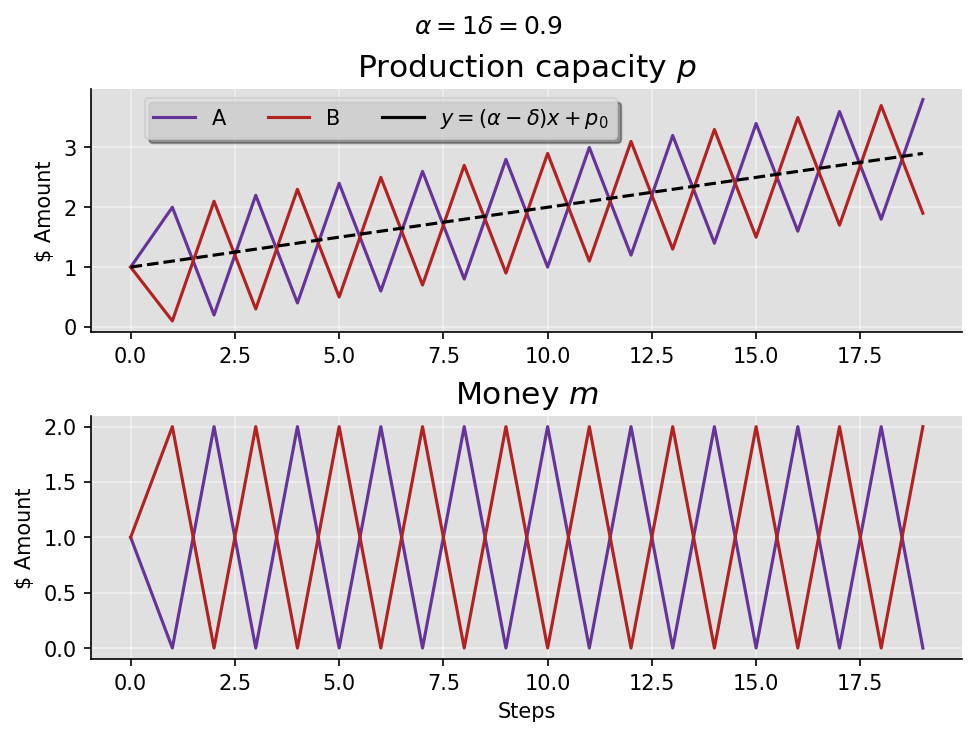

In [10]:
steps = 20
plot_alpha(steps, alpha=0.1);
plot_alpha_delta(steps, alpha=1, delta=0.9);

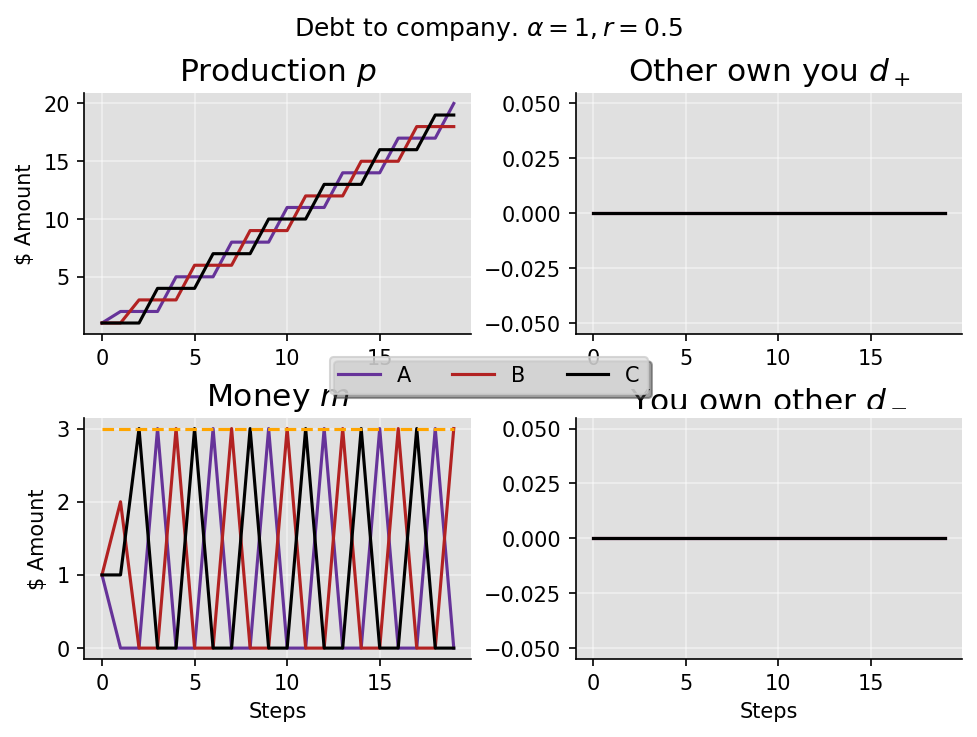

In [11]:
# Because all money is always at the buyer, the lender will never have any money to lend
plot_debt_three_company(steps=20, alpha=1, r=0.5, p_limit=False)

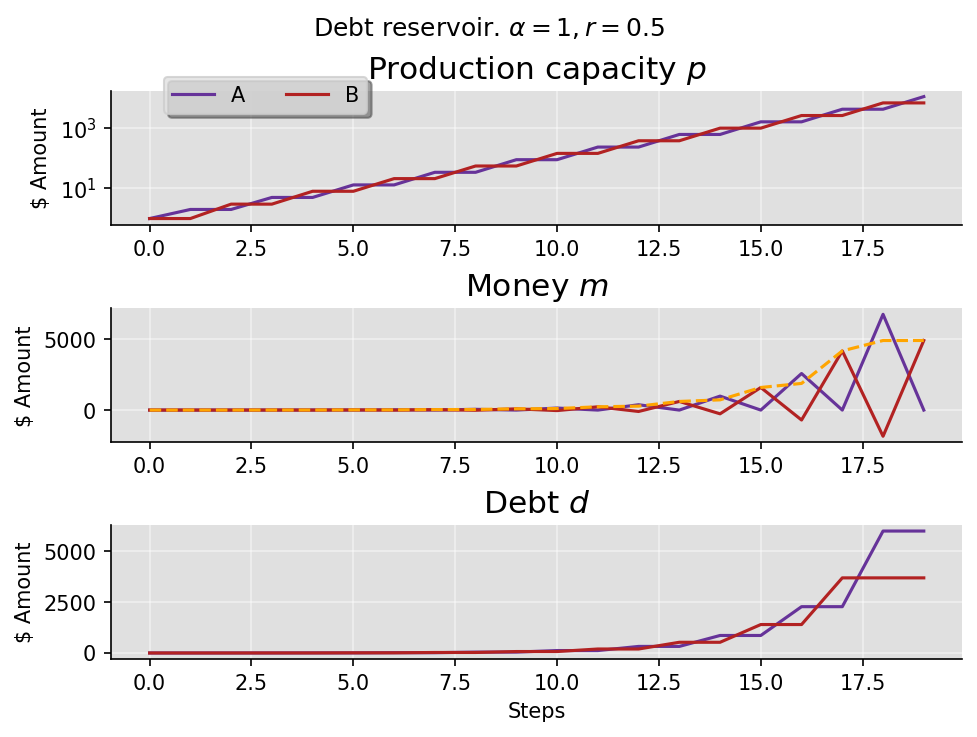

In [12]:
# ~Half the amount of debt if implements i % 2 == 0 condition, which makes sense.
plot_debt_reservoir(steps=20, alpha=1, r=0.5, p_limit=False)


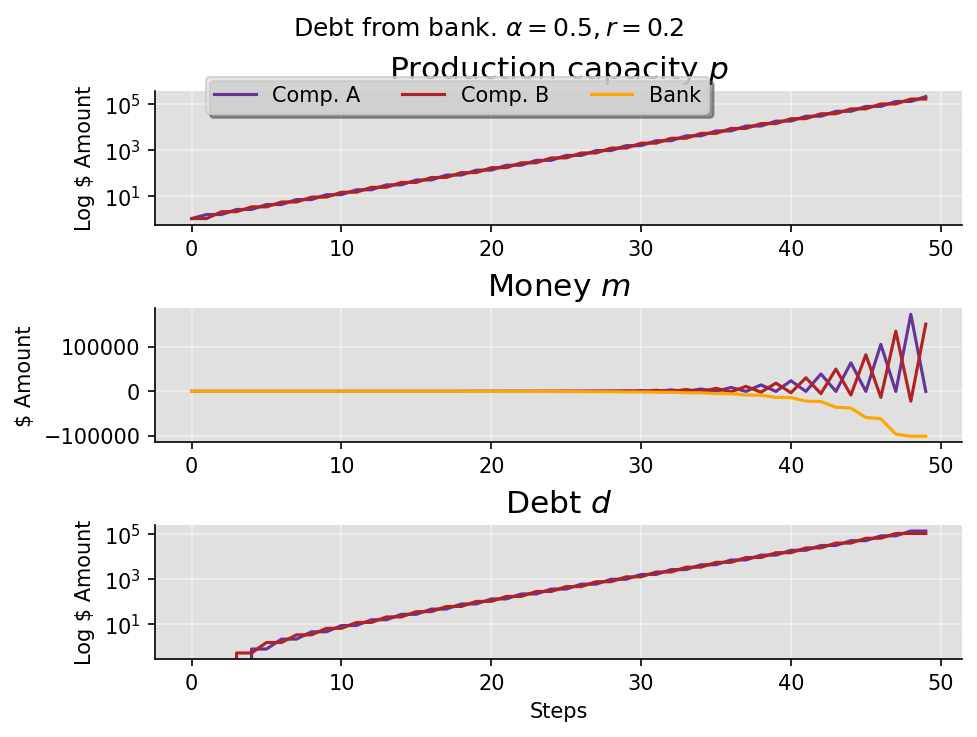

In [13]:
plot_debt_bank(steps=50, alpha=0.5, r=0.2)

- Må ikke gå i minus penge for at give lån
- Betal gæld når alle har haft købe chance
- Kom bank system på stor skala. 
- Bankens rente sættes således den ikke går bankerot. 
- Check om $\alpha$ og $\alpha-\delta$ systemet også er nær identisk for store, stokatiske systemer

# No money version

In [14]:
def nm(steps: int, alpha: float, show_output=False):
    """Two companies. No money version where the only attributes are debt and production capacity.
    steps (int): System iterations
    alpha (float): Money to production efficiency parameter
    show_output (bool): Print output
    """
    
    # Initial m and p values and history arrays
    p_hist = np.empty((2, steps))
    d_hist = np.empty_like(p_hist)
    p_hist[:, 0] = [1, 1]
    d_hist[:, 0] = [0, 0]
    
    buyer_idx = 0
    seller_idx = 1

    company_names = ["A", "B"]
    if show_output:
        print(f"alpha = {alpha}")
        print("\t    A \t           B")
        print("Buyer\t  p   d \t p   d \t Sum all")
        print(f"  \t {p_hist[0, 0]} {d_hist[0, 0]}\t{p_hist[1, 0]} {d_hist[1, 0]}\t   {p_hist[:, 0].sum() + d_hist[:, 0].sum()}\n")
    
    for i in range(1, steps):
        # Find money transfered
        # Assume buyer always is allowed to take on debt to match seller's production
        delta_d = p_hist[seller_idx, i-1]
        
        # Update values
        d_hist[buyer_idx, i] = d_hist[buyer_idx, i-1] + delta_d
        d_hist[seller_idx, i] = d_hist[seller_idx, i-1] - delta_d
        p_hist[buyer_idx, i] = p_hist[buyer_idx, i-1] + delta_d * alpha
        p_hist[seller_idx, i] = p_hist[seller_idx, i-1]
        
        # Print 
        sum_all = p_hist[:, i].sum() + d_hist[:, i].sum()
        if show_output: 
            print(f"  {company_names[buyer_idx]}\t {p_hist[0, i]} {d_hist[0, i]}\t{p_hist[1, i]} {d_hist[1, i]}\t   {sum_all}\n")
        
        # Swap buyer and seller idx
        temp_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = temp_buyer
    
    return p_hist, d_hist


def nm_delta(steps: int, alpha: float, delta: float, show_output):
    """_summary_

    Args:
        steps (int): _description_
        alpha (float): _description_
        delta (float): _description_
        show_output (_type_): _description_
    """
    # Initial m and p values and history arrays
    p_hist = np.empty((2, steps))
    d_hist = np.empty_like(p_hist)
    p_hist[:, 0] = [1, 1]
    d_hist[:, 0] = [0, 0]
    
    buyer_idx = 0
    seller_idx = 1

    company_names = ["A", "B"]
    if show_output:
        print(f"alpha = {alpha}")
        print("\t    A \t           B")
        print("Buyer\t  p   d \t p   d \t Sum all")
        print(f"  \t {p_hist[0, 0]} {d_hist[0, 0]}\t{p_hist[1, 0]} {d_hist[1, 0]}\t   {p_hist[:, 0].sum() + d_hist[:, 0].sum()}\n")
    
    for i in range(1, steps):
        # Find money transfered
        # Assume buyer always is allowed to take on debt to match seller's production
        delta_d = p_hist[seller_idx, i-1]
        
        # Update values
        d_hist[buyer_idx, i] = d_hist[buyer_idx, i-1] + delta_d
        d_hist[seller_idx, i] = d_hist[seller_idx, i-1] - delta_d
        p_hist[buyer_idx, i] = p_hist[buyer_idx, i-1] + delta_d * alpha
        p_hist[seller_idx, i] = p_hist[seller_idx, i-1] - delta * delta_d
        
        # Print 
        sum_all = p_hist[:, i].sum() + d_hist[:, i].sum()
        if show_output: 
            print(f"  {company_names[buyer_idx]}\t {p_hist[0, i]} {d_hist[0, i]}\t{p_hist[1, i]} {d_hist[1, i]}\t   {sum_all}\n")
        
        # Swap buyer and seller idx
        temp_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = temp_buyer
    
    return p_hist, d_hist

In [15]:
from scipy.optimize import curve_fit

def plot_nm(steps, alpha, show_output=False):
    p_hist, d_hist = nm(steps, alpha, show_output)
    p_a = p_hist[0, :]
    p_b = p_hist[1, :]
    d_a = d_hist[0, :]
    d_b = d_hist[1, :]
    steps = np.arange(len(p_a))
    alpha_line = exponential(steps, a=(alpha)/2)  # Alpha is divided by 2 because production capacity is only raised every other step
    
    # Fit an exponential function to the data
    params, covariance = curve_fit(exponential, steps, p_a, p0=alpha/2)
    fit_line = exponential(steps, *params)
    
    print(f"Fit alpha value = {params[0]:.5f} +- {np.sqrt(covariance[0, 0]):.5f}")    
        
    fig, (ax, ax1) = plt.subplots(nrows=2)
    # Money
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    ax.plot(steps, alpha_line, ls="dashed", color="black")
    ax.plot(steps, fit_line, ls="dashed", color="grey")
    
    # Debt
    ax1.plot(steps, d_a, color="rebeccapurple")
    ax1.plot(steps, d_b, color="firebrick")
    
    ax.set(ylabel="$ Amount", title=f"Production capacity $p$", yscale="log")
    ax1.set(xlabel="Steps", ylabel="$ Amount", title="Debt $d$")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),
                        Line2D([], [], color="black", label=r"$y=e^{p_0 \cdot \alpha / 2}$"),
                        Line2D([], [], color="grey", label=r"fit $\exp(\alpha x)$)"),]
    ax.legend(handles=legend_elements, ncols=4, bbox_to_anchor=(0.05, 0.75), loc="lower left", fontsize=8)
    fig.suptitle(t=fr"$\alpha = {alpha}$")
    plt.show()
    
    
def plot_nm_delta(steps, alpha, delta, show_output=False):
    p_hist, d_hist = nm_delta(steps, alpha, delta, show_output)
    p_a = p_hist[0, :]
    p_b = p_hist[1, :]
    d_a = d_hist[0, :]
    d_b = d_hist[1, :]
    steps = np.arange(len(p_a))
    alpha_line = exponential(steps, a=(alpha-delta)/2)  # Alpha is divided by 2 because production capacity is only raised every other step
    
    # Fit an exponential function to the data
    params, covariance = curve_fit(exponential, steps, p_a, p0=alpha/2)
    fit_line = exponential(steps, *params)
    
    print(f"Fit alpha value = {params[0]:.5f} +- {np.sqrt(covariance[0, 0]):.5f}")    
    
    fig, (ax, ax1) = plt.subplots(nrows=2)
    # Money
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    ax.plot(steps, alpha_line, ls="dashed", color="black")
    ax.plot(steps, fit_line, ls="dashed", color="grey")
    
    # Debt
    ax1.plot(steps, d_a, color="rebeccapurple")
    ax1.plot(steps, d_b, color="firebrick")
    
    ax.set(ylabel="$ Amount", title=f"Production capacity $p$", yscale="log")
    ax1.set(xlabel="Steps", ylabel="$ Amount", title="Debt $d$")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),
                        Line2D([], [], color="black", label=r"$y=e^{p_0 \cdot \alpha / 2}$"),
                        Line2D([], [], color="grey", label=r"fit $\exp(\alpha x)$)"),]
    ax.legend(handles=legend_elements, ncols=4, bbox_to_anchor=(0.05, 0.75), loc="lower left", fontsize=8)
    fig.suptitle(t=fr"$\alpha = {alpha}, \delta = {delta}$")
    plt.show()

Fit alpha value = 0.24762 +- 0.00012


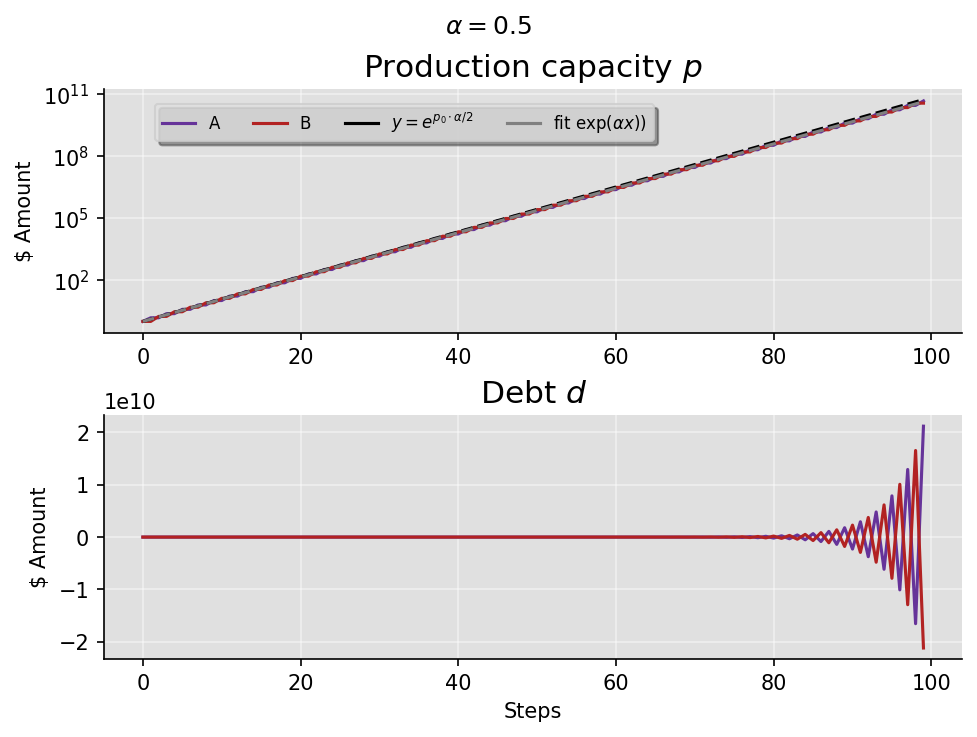

Fit alpha value = 0.31256 +- 0.00040


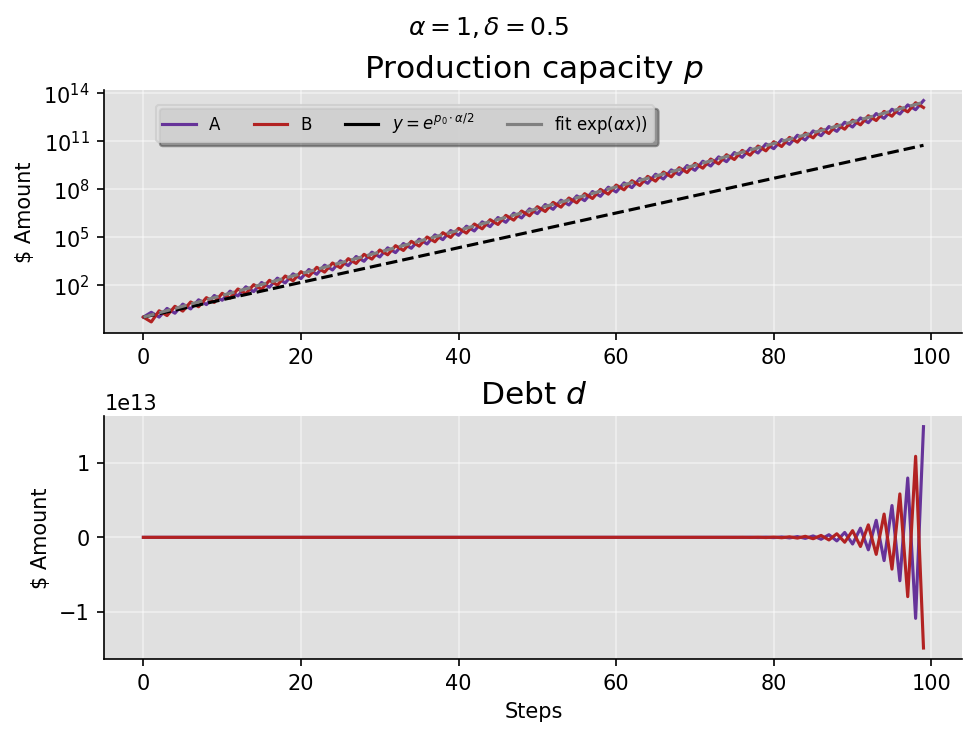

In [16]:
plot_nm(steps=100, alpha=0.5, show_output=False)
plot_nm_delta(steps=100, alpha=1, delta=0.5, show_output=False)

### Take away points:
- I would expect the growht exponent to be $\alpha / 2$, because the production capacity is only updated every other step. However, it is in fact slightly smaller. 
- Previously, $\delta$ simply resulted in an effectively smaller $\alpha$ value, but now because $\Delta d$ depends on $p$ whereas it previously it effectively depended only on $m$, introducing $\delta$ is *not* the same as shifting $\alpha$ - At least not under the simple assumption that $\Delta d_j = p_i$

### ... So what if we use the full debt expression?
$$ \Delta d_j = \min{(\frac{\beta_j p_j}{r} - d_j, p_i)} $$

For simplicity, assume $\beta_j \approx r$, reducing the expression to
$$ \Delta d_j = \min{(p_j - d_j, p_i)} $$


In [17]:
def nm_full_debt(steps: int, alpha: float, show_output=False):
    """Two companies. No money version where the only attributes are debt and production capacity.
    steps (int): System iterations
    alpha (float): Money to production efficiency parameter
    show_output (bool): Print output
    """
    
    # Initial m and p values and history arrays
    p_hist = np.empty((2, steps))
    d_hist = np.empty_like(p_hist)
    p_hist[:, 0] = [1, 1]
    d_hist[:, 0] = [0, 0]
    
    buyer_idx = 0
    seller_idx = 1

    company_names = ["A", "B"]
    if show_output:
        print(f"alpha = {alpha}")
        print("\t    A \t           B")
        print("Buyer\t  p   d \t p   d \t Sum all")
        print(f"  \t {p_hist[0, 0]} {d_hist[0, 0]}\t{p_hist[1, 0]} {d_hist[1, 0]}\t   {p_hist[:, 0].sum() + d_hist[:, 0].sum()}\n")
    
    for i in range(1, steps):
        # Find money transfered
        delta_d = np.min((p_hist[buyer_idx, i-1] - d_hist[buyer_idx, i-1], p_hist[seller_idx, i-1]))
        delta_d = np.max((0, delta_d))
        
        # Update values
        d_hist[buyer_idx, i] = d_hist[buyer_idx, i-1] + delta_d
        d_hist[seller_idx, i] = d_hist[seller_idx, i-1] - delta_d
        p_hist[buyer_idx, i] = p_hist[buyer_idx, i-1] + delta_d * alpha
        p_hist[seller_idx, i] = p_hist[seller_idx, i-1]
        
        # Print 
        sum_all = p_hist[:, i].sum() + d_hist[:, i].sum()
        if show_output: 
            print(f"  {company_names[buyer_idx]}\t {p_hist[0, i]} {d_hist[0, i]}\t{p_hist[1, i]} {d_hist[1, i]}\t   {sum_all}\n")
        
        # Swap buyer and seller idx
        temp_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = temp_buyer
    
    return p_hist, d_hist

In [18]:
def plot_nm_full_debt(steps, alpha, show_output=False):
    p_hist, d_hist = nm_full_debt(steps, alpha, show_output)
    p_a = p_hist[0, :]
    p_b = p_hist[1, :]
    d_a = d_hist[0, :]
    d_b = d_hist[1, :]
    steps = np.arange(len(p_a))
    alpha_line = exponential(steps, a=(alpha)/2)  # Alpha is divided by 2 because production capacity is only raised every other step
    
    # Fit an exponential function to the data
    params, covariance = curve_fit(exponential, steps, p_a, p0=alpha/2)
    fit_line = exponential(steps, *params)
    
    print(f"Fit alpha value = {params[0]:.5f} +- {np.sqrt(covariance[0, 0]):.5f}")    
        
    fig, (ax, ax1) = plt.subplots(nrows=2)
    # Money
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    ax.plot(steps, alpha_line, ls="dashed", color="black")
    ax.plot(steps, fit_line, ls="dashed", color="grey")
    
    # Debt
    ax1.plot(steps, d_a, color="rebeccapurple")
    ax1.plot(steps, d_b, color="firebrick")
    
    ax.set(ylabel="$ Amount", title=f"Production capacity $p$", yscale="log")
    ax1.set(xlabel="Steps", ylabel="$ Amount", title="Debt $d$")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),
                        Line2D([], [], color="black", label=r"$y=e^{p_0 \cdot \alpha / 2}$"),
                        Line2D([], [], color="grey", label=r"fit $\exp(\alpha x)$)"),]
    ax.legend(handles=legend_elements, ncols=4, bbox_to_anchor=(0.05, 0.75), loc="lower left", fontsize=8)
    fig.suptitle(t=fr"$\alpha = {alpha}$")
    plt.show()
    


Fit alpha value = 0.25063 +- 0.00485


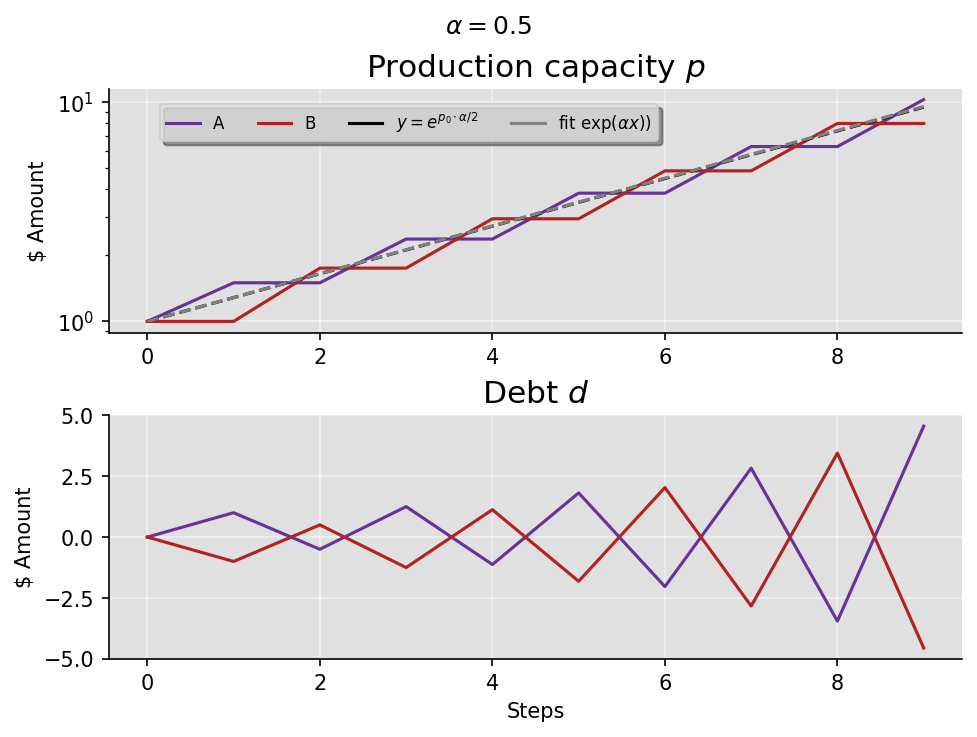

In [19]:
plot_nm_full_debt(steps=10, alpha=0.5, show_output=False)

In [24]:
def nm_full_debt_delta(steps: int, alpha: float, delta: float, show_output):
    """_summary_

    Args:
        steps (int): _description_
        alpha (float): _description_
        delta (float): _description_
        show_output (_type_): _description_
    """
    # Initial m and p values and history arrays
    p_hist = np.empty((2, steps))
    d_hist = np.empty_like(p_hist)
    p_hist[:, 0] = [1, 1]
    d_hist[:, 0] = [0, 0]
    
    buyer_idx = 0
    seller_idx = 1

    company_names = ["A", "B"]
    if show_output:
        print(f"alpha = {alpha}")
        print("\t    A \t           B")
        print("Buyer\t  p   d \t p   d \t Sum all")
        print(f"  \t {p_hist[0, 0]} {d_hist[0, 0]}\t{p_hist[1, 0]} {d_hist[1, 0]}\t   {p_hist[:, 0].sum() + d_hist[:, 0].sum()}\n")
    
    for i in range(1, steps):
        # Find money transfered
        delta_d = np.min((p_hist[buyer_idx, i-1] - d_hist[buyer_idx, i-1], p_hist[seller_idx, i-1]))
        delta_d = np.max((0, delta_d))
        
        # Update values from transaction
        d_hist[buyer_idx, i] = d_hist[buyer_idx, i-1] + delta_d
        d_hist[seller_idx, i] = d_hist[seller_idx, i-1] - delta_d
        p_hist[buyer_idx, i] = p_hist[buyer_idx, i-1] + delta_d * alpha
        p_hist[seller_idx, i] = p_hist[seller_idx, i-1] - delta * delta_d
        
        # Print 
        sum_all = p_hist[:, i].sum() + d_hist[:, i].sum()
        if show_output: 
            print(f"  {company_names[buyer_idx]}\t {p_hist[0, i]} {d_hist[0, i]}\t{p_hist[1, i]} {d_hist[1, i]}\t   {sum_all}\n")
        
        # Swap buyer and seller idx
        temp_buyer = buyer_idx  # Dummy variable for storing the buyer value
        buyer_idx = seller_idx
        seller_idx = temp_buyer
    
    return p_hist, d_hist


def plot_nm_delta_full_debt(steps, alpha, delta, show_output=False):
    p_hist, d_hist = nm_full_debt_delta(steps, alpha, delta, show_output)
    p_a = p_hist[0, :]
    p_b = p_hist[1, :]
    d_a = d_hist[0, :]
    d_b = d_hist[1, :]
    steps = np.arange(len(p_a))
    alpha_line = exponential(steps, a=(alpha-delta)/2)  # Alpha is divided by 2 because production capacity is only raised every other step
    
    # Fit an exponential function to the data
    params, covariance = curve_fit(exponential, steps, p_a, p0=alpha/2)
    fit_line = exponential(steps, *params)
    
    print(f"Fit alpha value = {params[0]:.5f} +- {np.sqrt(covariance[0, 0]):.5f}")    
    
    fig, (ax, ax1) = plt.subplots(nrows=2)
    # Money
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_b, color="firebrick")
    ax.plot(steps, alpha_line, ls="dashed", color="black")
    ax.plot(steps, fit_line, ls="dashed", color="grey")
    
    # Debt
    ax1.plot(steps, d_a, color="rebeccapurple")
    ax1.plot(steps, d_b, color="firebrick")
    
    ax.set(ylabel="$ Amount", title=f"Production capacity $p$", yscale="log")
    ax1.set(xlabel="Steps", ylabel="$ Amount", title="Debt $d$")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label="A"),
                        Line2D([], [], color="firebrick", label="B"),
                        Line2D([], [], color="black", label=r"$y=e^{p_0 \cdot \alpha / 2}$"),
                        Line2D([], [], color="grey", label=r"fit $\exp(\alpha x)$)"),]
    ax.legend(handles=legend_elements, ncols=4, bbox_to_anchor=(0.05, 0.75), loc="lower left", fontsize=8)
    fig.suptitle(t=fr"$\alpha = {alpha}, \delta = {delta}$")
    plt.show()


#### Comparing the $\alpha$ and $\alpha-\delta$ plots

Fit alpha value = 0.24535 +- 0.00111


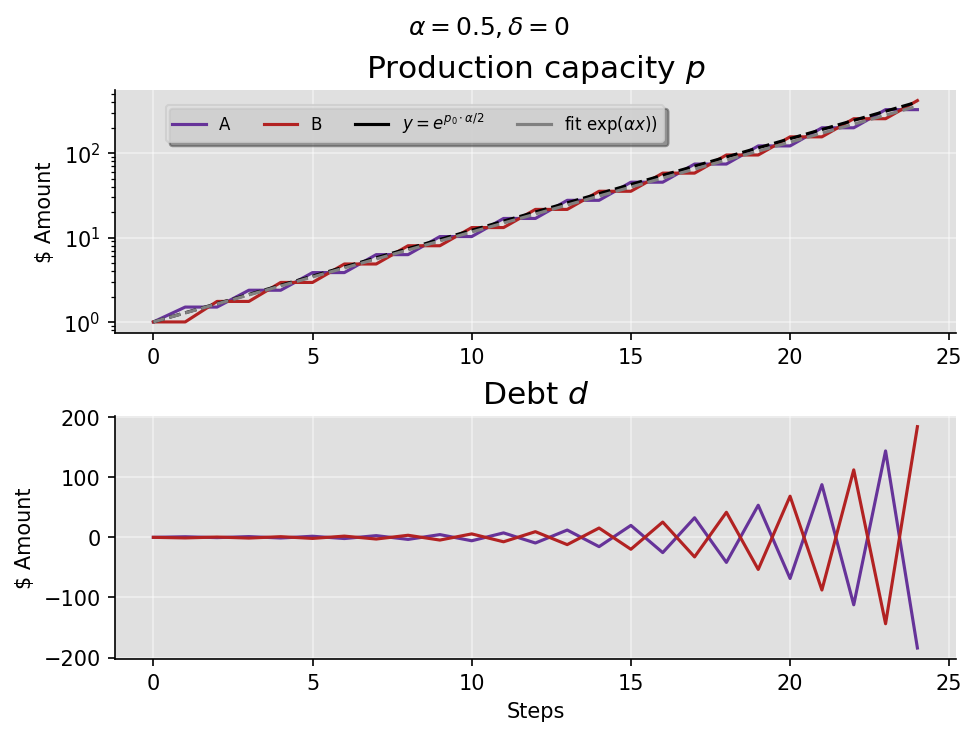

Fit alpha value = 0.24231 +- 0.00357


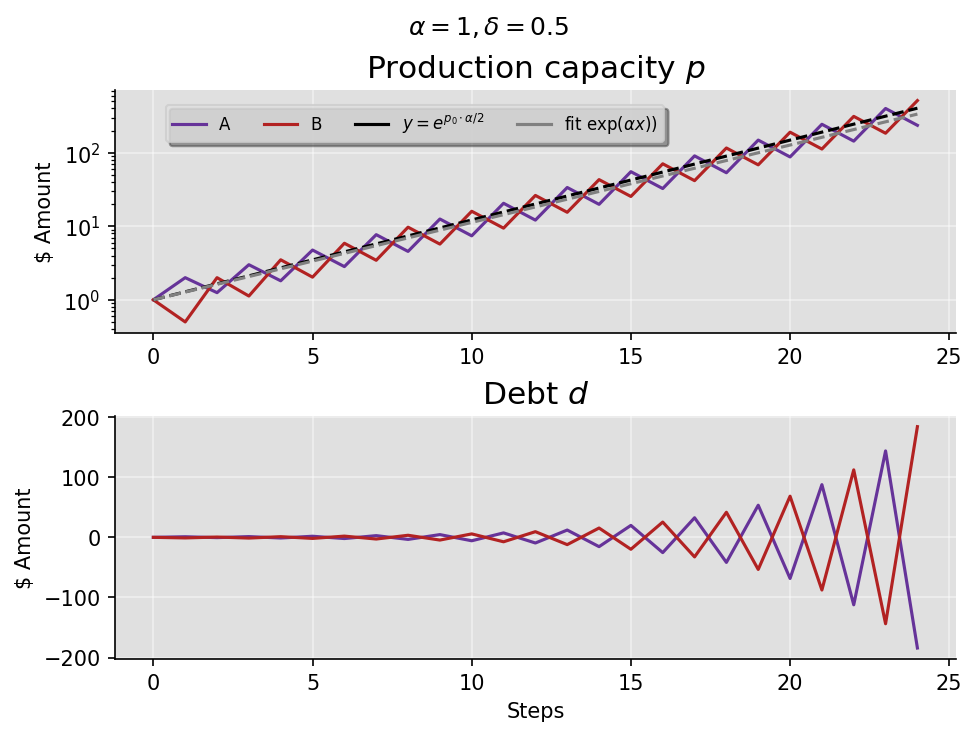

In [34]:
plot_nm_delta_full_debt(steps=25, alpha=0.5, delta=0, show_output=False)
plot_nm_delta_full_debt(steps=25, alpha=1, delta=0.5, show_output=False)

In [43]:
def plot_nm_delta_full_debt_comparison(steps, alpha, delta, show_output=False):
    alpha_ad = alpha + delta
    p_hist, d_hist = nm_full_debt(steps, alpha, show_output=show_output)
    p_hist_ad, d_hist_ad = nm_full_debt_delta(steps, alpha_ad, delta, show_output)
    p_a = p_hist[0, :]
    d_a = d_hist[0, :]
    p_ad = p_hist_ad[0, :]
    d_ad = d_hist_ad[0, :] 
    
    steps = np.arange(len(p_a))
    
    fig, (ax, ax1) = plt.subplots(nrows=2)
    # Money
    ax.plot(steps, p_a, color="rebeccapurple")
    ax.plot(steps, p_ad, color="firebrick")
    
    # Debt
    ax1.plot(steps, d_a, color="rebeccapurple")
    ax1.plot(steps, d_ad, color="firebrick")
    
    ax.set(ylabel="Log $ Amount", title=f"Production capacity $p$", yscale="log")
    ax1.set(xlabel="Steps", ylabel="$ Amount", title="Debt $d$")
    ax.grid()
    ax1.grid()

    legend_elements = [Line2D([], [], color="rebeccapurple", label=fr"$\alpha = {alpha}$"),
                        Line2D([], [], color="firebrick", label=fr"$\alpha = {alpha_ad}, \delta = {delta}$"),
    ]
    ax.legend(handles=legend_elements, ncols=2, bbox_to_anchor=(0.05, 0.75), loc="lower left", fontsize=8)
    plt.show()

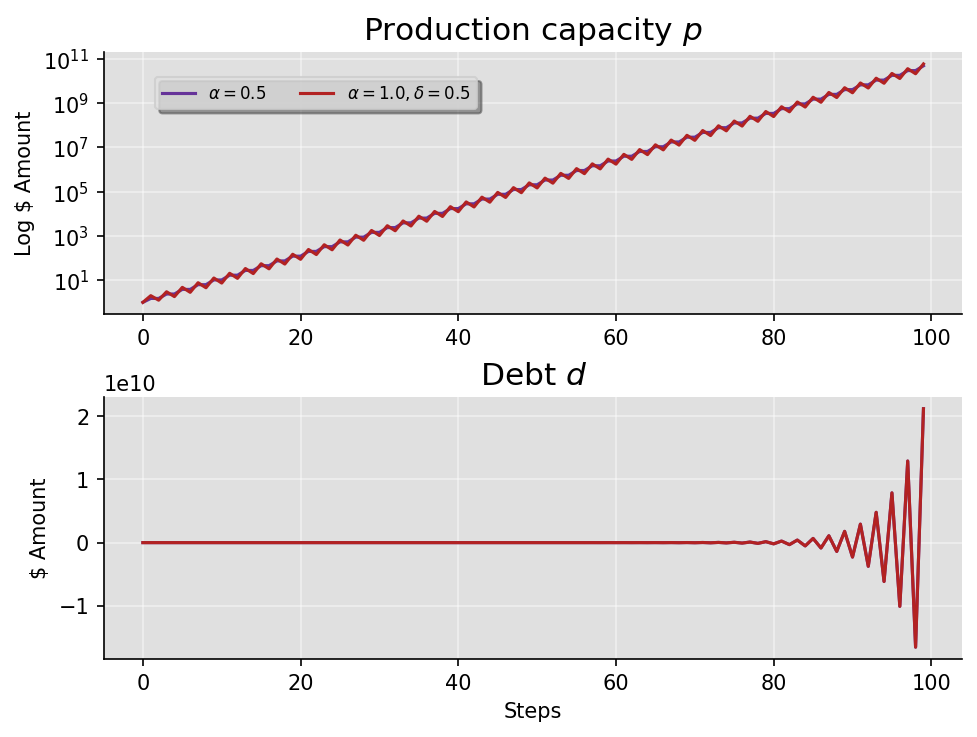

In [44]:
plot_nm_delta_full_debt_comparison(steps=100, alpha=0.5, delta=0.5, show_output=False)

Fit alpha value = 0.06203 +- 0.00010


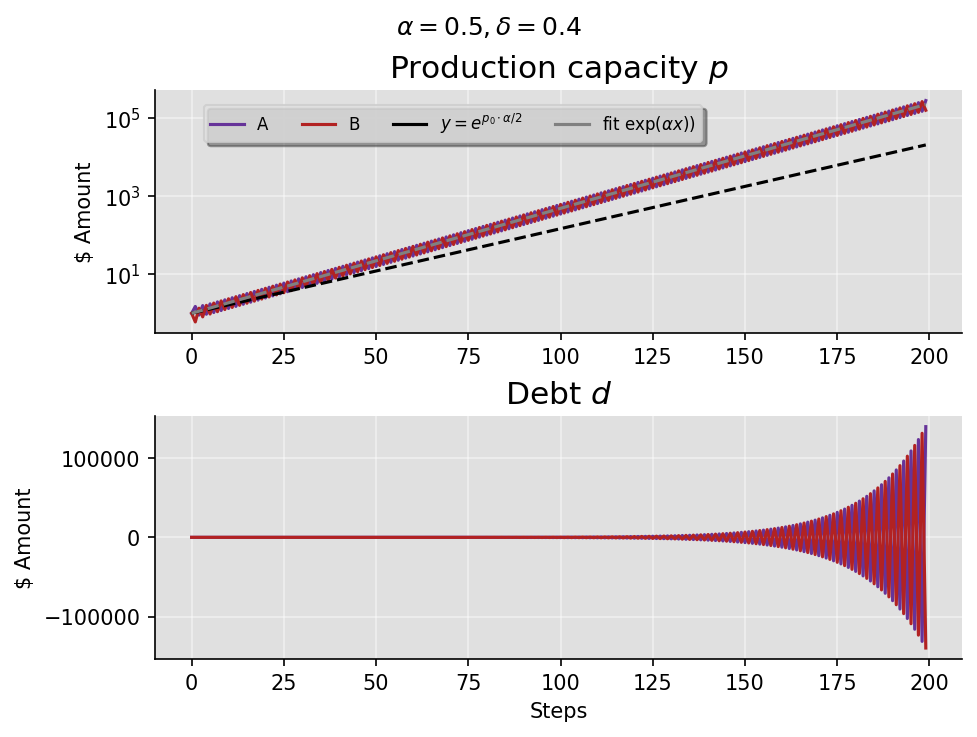

Fit alpha value = 0.06203 +- 0.00010


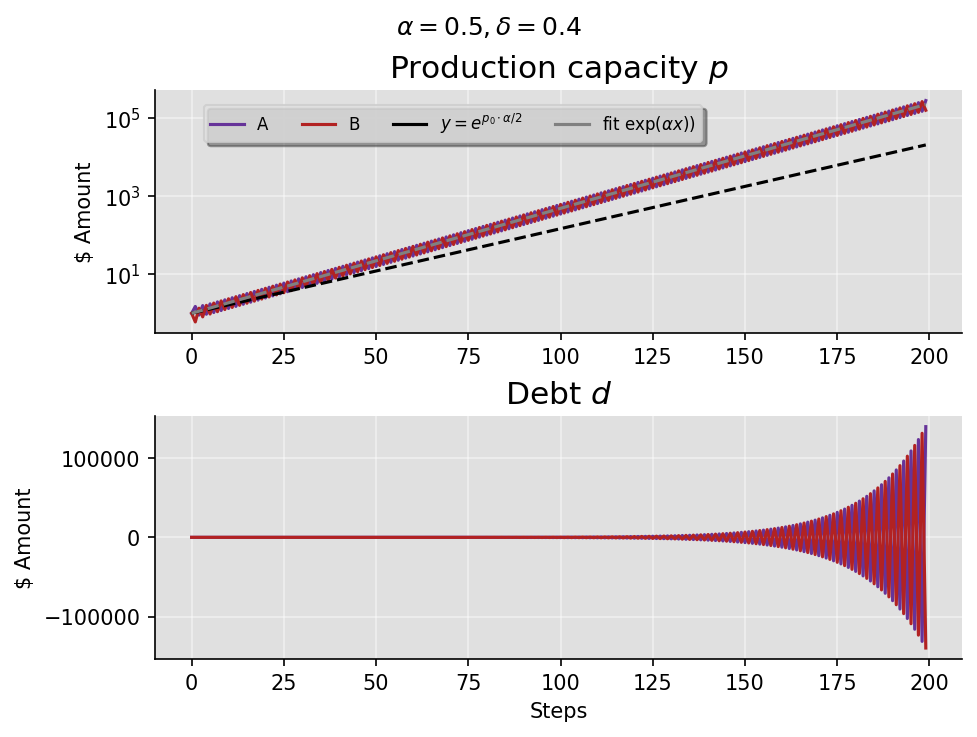

In [129]:
plot_nm_delta_full_debt(steps=200, alpha=0.5, delta=0.4, show_output=False)
plot_nm_delta(steps=200, alpha=0.5, delta=0.4, show_output=False)